# Analisis Exploratorio de Datos (EDA)

### Importamos librerías

Estas librerías nos permiten manipular los datos y visualizarlos.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import langid
import sys
sys.path.insert(0, '../')
import Herramientas as Herr

### EDA de **australian_reviews**

#### Carga de datos

In [2]:
data_reviews = pd.read_csv('../datasets/australian_reviews.csv',encoding='utf-8')
data_reviews

,user_id,user_url,posted,item_id,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011,1250,True,Simple yet with great replayability. In my opi...
1,js41637,http://steamcommunity.com/id/js41637,2014,251610,True,I know what you think when you see this title ...
2,evcentric,http://steamcommunity.com/id/evcentric,2014,248820,True,A suitably punishing roguelike platformer. Wi...
3,doctr,http://steamcommunity.com/id/doctr,2013,250320,True,This game... is so fun. The fight sequences ha...
4,maplemage,http://steamcommunity.com/id/maplemage,2014,211420,True,Git gud
...,...,...,...,...,...,...
59001,SKELETRONPRIMEISOP,http://steamcommunity.com/id/SKELETRONPRIMEISOP,2014,440,True,TF2 is alot of fun and its really good but the...
59002,76561198141079508,http://steamcommunity.com/profiles/76561198141...,2014,304930,True,Fun game with friends
59003,ShadowYT100,http://steamcommunity.com/id/ShadowYT100,2015,265630,True,So Fun!! :D
59004,bestcustomurlevermade,http://steamcommunity.com/id/bestcustomurlever...,2015,304050,True,"This game is great. The only thing is,Why cant..."


Revisamos que la exportación hecha previamente sea correcta.

In [3]:
Herr.analizar_datos(data_reviews)

,Nombre,Tipos de Datos Únicos,% de Valores No Nulos,% de Valores Nulos,Cantidad de Valores Nulos
0,user_id,[<class 'str'>],100.0,0.0,0
1,user_url,[<class 'str'>],100.0,0.0,0
2,posted,[<class 'int'>],100.0,0.0,0
3,item_id,[<class 'int'>],100.0,0.0,0
4,recommend,[<class 'bool'>],100.0,0.0,0
5,review,[<class 'str'>],100.0,0.0,0


Esta visualizacion nos permite observar la cantidad de juegos publicados en cada año. # Revisarloooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo

In [3]:
sns.countplot(data_reviews,x='posted',hue='posted')
plt.show()

NameError: name 'data_reviews' is not defined

Se analizaron la cantidad de comentarios según el idioma y, si es posible, se realizarán medidas.

In [6]:
contador_idiomas = {}

for resenia in data_reviews['review']:
    idioma,_ = langid.classify(resenia)
    contador_idiomas[idioma] = contador_idiomas.get(idioma,0) + 1

Hay una predominancia de los comentarios en inglés, pero al haber muchos otros comentarios en diferentes idiomas, no los borraremos ya que sí se considera que representan cantidades significativas.

In [7]:
contador_idiomas.sorted_index()

AttributeError: 'dict' object has no attribute 'sorted_index'

Ahora haremos el analisis de sentimiento

In [ ]:
data_reviews['sentiment_analysis'] = data_reviews['review'].apply(Herr.analisis_sentimiento)

Se hizo el analisis de sentimiento y ahora eliminamos la columna reviews dado qu ya tenemos los datos necesarios

In [ ]:
data_reviews = data_reviews.drop('review',axis=1)


In [ ]:
data_reviews

,user_id,user_url,posted,item_id,recommend,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011,1250,True,1
1,js41637,http://steamcommunity.com/id/js41637,2014,251610,True,1
2,evcentric,http://steamcommunity.com/id/evcentric,2014,248820,True,1
3,doctr,http://steamcommunity.com/id/doctr,2013,250320,True,2
4,maplemage,http://steamcommunity.com/id/maplemage,2014,211420,True,1
...,...,...,...,...,...,...
59001,SKELETRONPRIMEISOP,http://steamcommunity.com/id/SKELETRONPRIMEISOP,2014,440,True,1
59002,76561198141079508,http://steamcommunity.com/profiles/76561198141...,2014,304930,True,1
59003,ShadowYT100,http://steamcommunity.com/id/ShadowYT100,2015,265630,True,2
59004,bestcustomurlevermade,http://steamcommunity.com/id/bestcustomurlever...,2015,304050,True,1


<Axes: xlabel='sentiment_analysis', ylabel='count'>

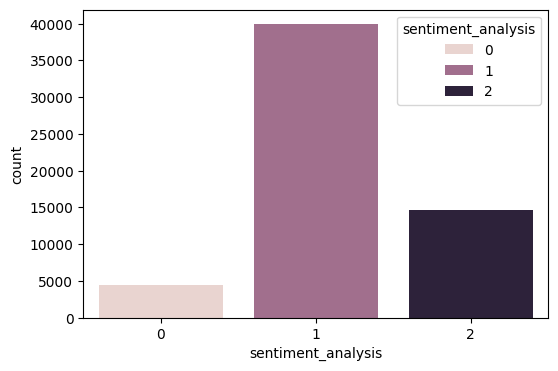

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data_reviews,x='sentiment_analysis',hue='sentiment_analysis')

In [ ]:
Herr.cantidad_porcentaje(data_reviews,'sentiment_analysis')

Los valores de sentiment_analysis
1    39911
2    14661
0     4434
El porcentaje de cada valor
1    67.64
2    24.85
0     7.51


In [ ]:
Herr.analizar_datos(data_reviews)

,Nombre,Tipos de Datos Únicos,% de Valores No Nulos,% de Valores Nulos,Cantidad de Valores Nulos
0,user_id,[<class 'str'>],100.0,0.0,0
1,user_url,[<class 'str'>],100.0,0.0,0
2,posted,[<class 'int'>],100.0,0.0,0
3,item_id,[<class 'int'>],100.0,0.0,0
4,recommend,[<class 'bool'>],100.0,0.0,0
5,sentiment_analysis,[<class 'int'>],100.0,0.0,0


<Axes: xlabel='recommend', ylabel='count'>

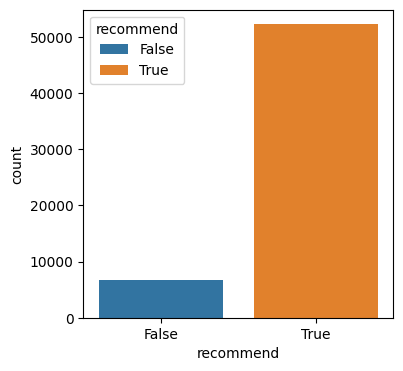

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(data_reviews,x='recommend',hue='recommend')

In [ ]:
Herr.cantidad_porcentaje(data_reviews,'recommend')

Los valores de recommend
True     52206
False     6800
El porcentaje de cada valor
True     88.48
False    11.52


### EDA de **australian_items**

#### Carga de datos

In [ ]:
data_items = pd.read_csv('../datasets/australian_items.csv',encoding='utf-8')
data_items

,item_id,item_name,playtime_forever,user_id,items_count,steam_id
0,10,Counter-Strike,6.0,76561197970982479,277,76561197970982479
1,20,Team Fortress Classic,0.0,76561197970982479,277,76561197970982479
2,30,Day of Defeat,7.0,76561197970982479,277,76561197970982479
3,40,Deathmatch Classic,0.0,76561197970982479,277,76561197970982479
4,50,Half-Life: Opposing Force,0.0,76561197970982479,277,76561197970982479
...,...,...,...,...,...,...
5153204,346330,BrainBread 2,0.0,76561198329548331,7,76561198329548331
5153205,373330,All Is Dust,0.0,76561198329548331,7,76561198329548331
5153206,388490,One Way To Die: Steam Edition,3.0,76561198329548331,7,76561198329548331
5153207,521570,You Have 10 Seconds 2,4.0,76561198329548331,7,76561198329548331


In [ ]:
data_items['playtime_forever'] = data_items['playtime_forever'].astype(int)
data_items['playtime_forever'] = data_items['playtime_forever'] / 60

In [ ]:
Herr.analizar_datos(data_items)

,Nombre,Tipos de Datos Únicos,% de Valores No Nulos,% de Valores Nulos,Cantidad de Valores Nulos
0,item_id,[<class 'int'>],100.0,0.0,0
1,item_name,[<class 'str'>],100.0,0.0,0
2,playtime_forever,[<class 'float'>],100.0,0.0,0
3,user_id,[<class 'str'>],100.0,0.0,0
4,items_count,[<class 'int'>],100.0,0.0,0
5,steam_id,[<class 'int'>],100.0,0.0,0


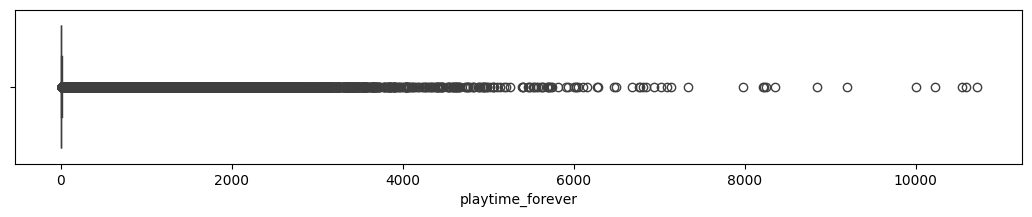

In [ ]:
plt.figure(figsize=(13,2))
sns.boxplot(data_items,x='playtime_forever')
plt.show()

acordarse de exportar el csv con la actualizacion de analisis de sentimiento

### EDA de outputs

#### Carga de datos

In [ ]:
data_output = pd.read_csv('../datasets/output.csv',encoding='utf-8')
data_output

,publisher,genres,app_name,title,release_date,price,early_access,id,developer
0,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,2018,4.99,False,761140,Kotoshiro
1,Kotoshiro,Casual,Lost Summoner Kitty,Lost Summoner Kitty,2018,4.99,False,761140,Kotoshiro
2,Kotoshiro,Indie,Lost Summoner Kitty,Lost Summoner Kitty,2018,4.99,False,761140,Kotoshiro
3,Kotoshiro,Simulation,Lost Summoner Kitty,Lost Summoner Kitty,2018,4.99,False,761140,Kotoshiro
4,Kotoshiro,Strategy,Lost Summoner Kitty,Lost Summoner Kitty,2018,4.99,False,761140,Kotoshiro
...,...,...,...,...,...,...,...,...,...
71546,Laush Studio,Indie,Russian Roads,Russian Roads,2018,1.99,False,610660,Laush Dmitriy Sergeevich
71547,Laush Studio,Racing,Russian Roads,Russian Roads,2018,1.99,False,610660,Laush Dmitriy Sergeevich
71548,Laush Studio,Simulation,Russian Roads,Russian Roads,2018,1.99,False,610660,Laush Dmitriy Sergeevich
71549,SIXNAILS,Casual,EXIT 2 - Directions,EXIT 2 - Directions,2017,4.99,False,658870,"xropi,stev3ns"


In [ ]:
Herr.analizar_datos(data_output)

,Nombre,Tipos de Datos Únicos,% de Valores No Nulos,% de Valores Nulos,Cantidad de Valores Nulos
0,publisher,[<class 'str'>],100.0,0.0,0
1,genres,[<class 'str'>],100.0,0.0,0
2,app_name,[<class 'str'>],100.0,0.0,0
3,title,[<class 'str'>],100.0,0.0,0
4,release_date,[<class 'str'>],100.0,0.0,0
5,price,[<class 'float'>],100.0,0.0,0
6,early_access,[<class 'bool'>],100.0,0.0,0
7,id,[<class 'int'>],100.0,0.0,0
8,developer,[<class 'str'>],100.0,0.0,0


In [ ]:
data_output['publisher'] = data_output['publisher'].fillna('No data')


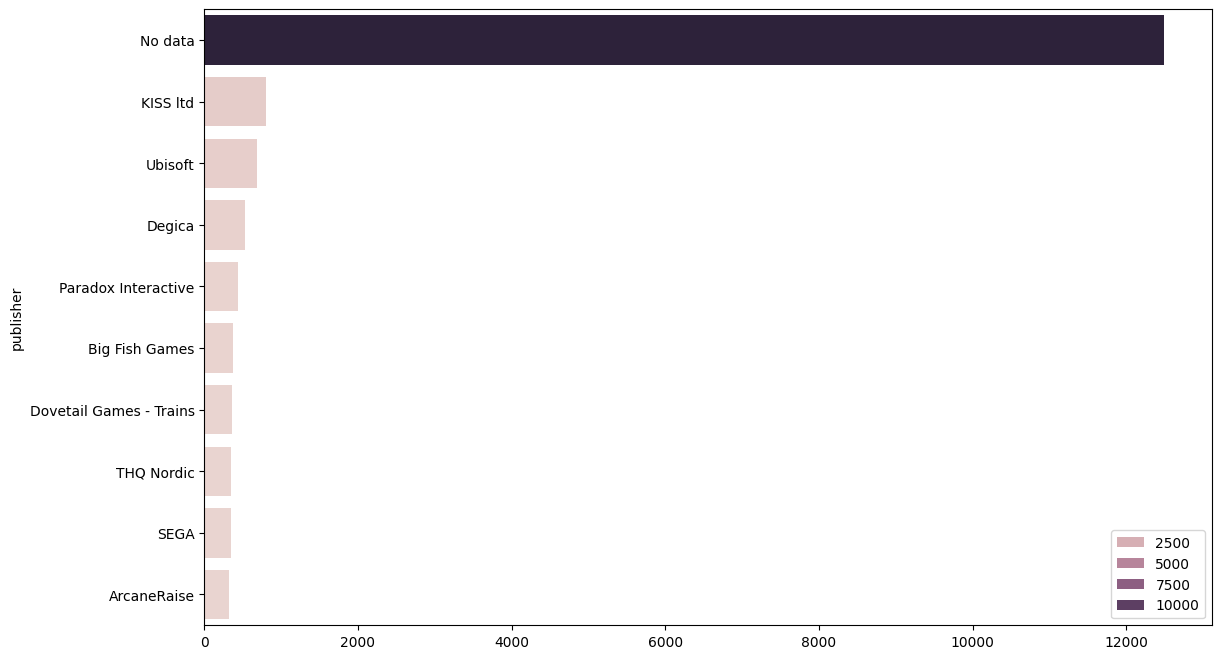

In [ ]:
contador_publisher = data_output['publisher'].value_counts()
top10_publisher = contador_publisher.head(10)
plt.figure(figsize=(13,8))
sns.barplot(x=top10_publisher.values,y=top10_publisher.index,hue=top10_publisher.values)
plt.show()

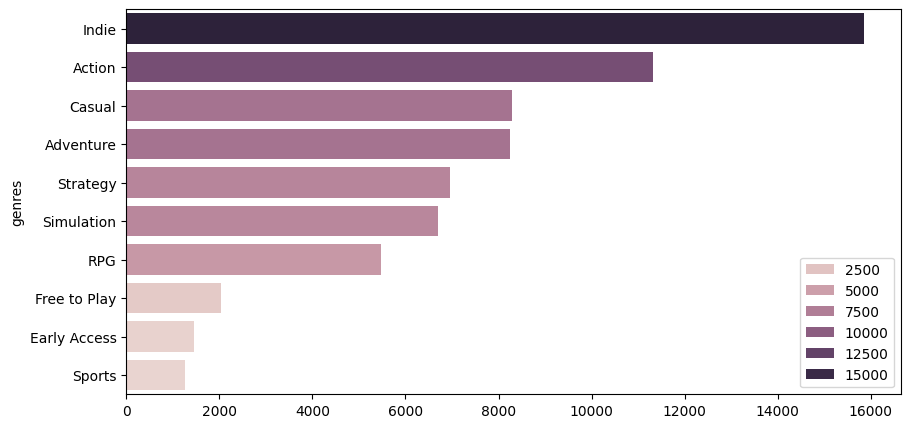

In [ ]:
contador_genres = data_output['genres'].value_counts()
top10_genres = contador_genres.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10_genres.values,y=top10_genres.index,hue=top10_genres.values)
plt.show()


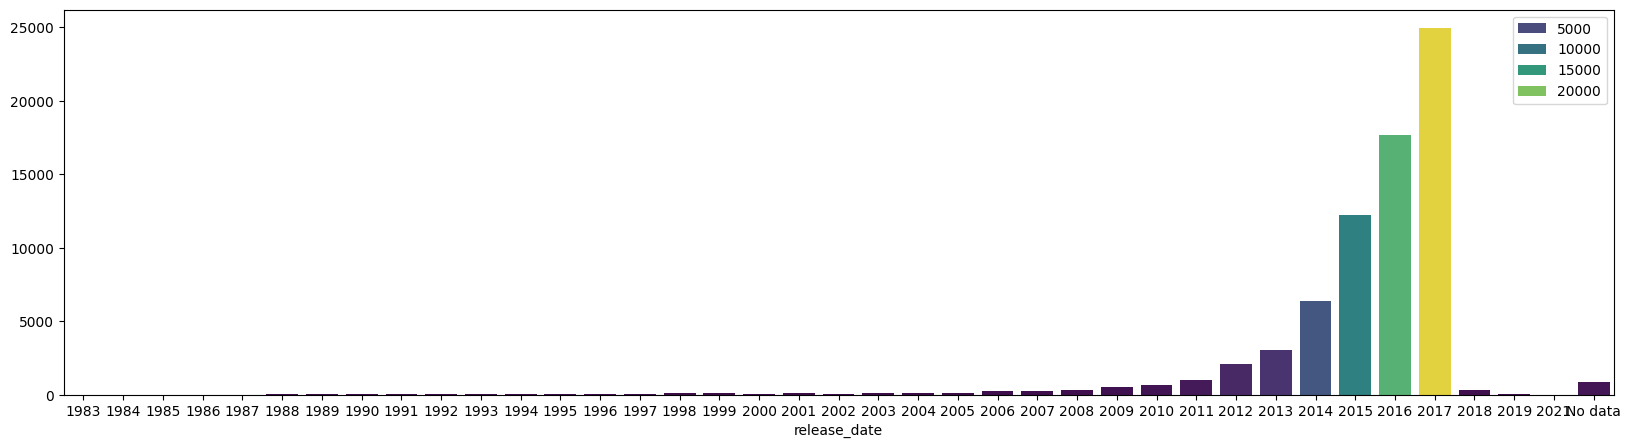

In [ ]:
contador_date = data_output['release_date'].value_counts().sort_index()
plt.figure(figsize=(20,5))
sns.barplot(y=contador_date.values,x=contador_date.index,hue=contador_date.values,palette='viridis')
plt.show()

In [ ]:
data_output['price'].describe()

count    71551.000000
mean         8.444274
std         15.767991
min          0.000000
25%          1.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

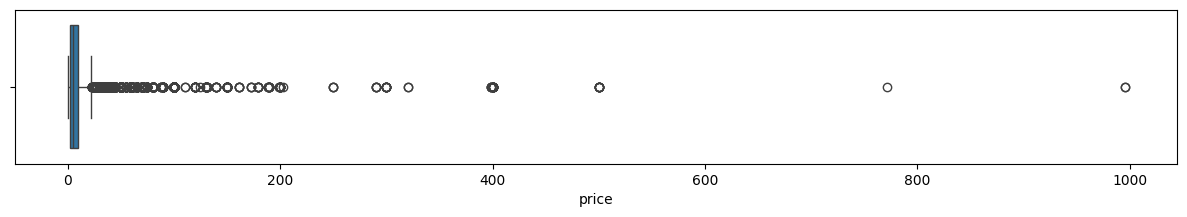

In [ ]:
plt.figure(figsize=(15,2))
sns.boxplot(data_output,x='price')
plt.show()

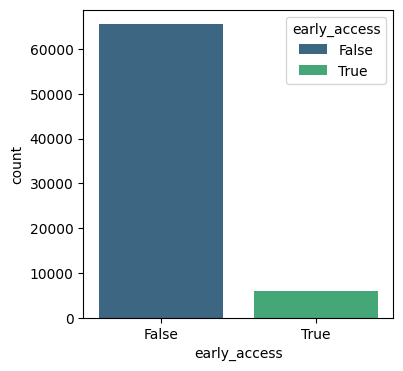

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(data_output,x='early_access',hue='early_access',palette='viridis')
plt.show()

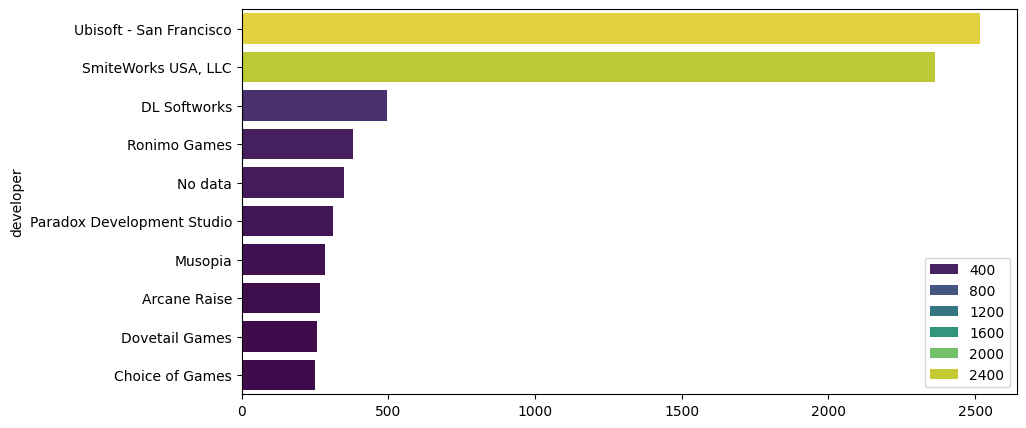

In [ ]:
contador_developer = data_output['developer'].value_counts()
top10_developer = contador_developer.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10_developer.values,y=top10_developer.index,hue=top10_developer.values,palette='viridis')
plt.show()


In [ ]:
ruta = '../datasets/australian_reviews_listo.csv'

data_reviews.to_csv(ruta,encoding='utf-8',index=False)